In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Dataset

In [49]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [50]:
x=df.iloc[:,5:8]
x


,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


# PLOT FOR GENDER RATIO

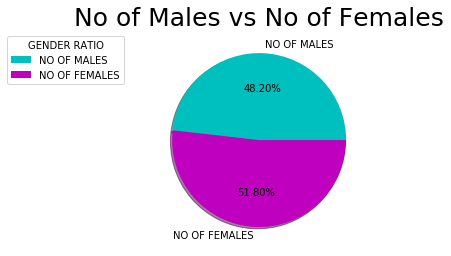

In [51]:
#count no males and females
males=df['gender'].value_counts()['male']
females=df['gender'].value_counts()['female']

#plot pie chart
labels='NO OF MALES','NO OF FEMALES'
sizes=[males,females]
colors = ['c', 'm']

plt.pie(sizes,labels=labels,shadow= True,autopct='%1.2f%%',colors=colors)
plt.title('No of Males vs No of Females',size=25)
plt.legend(labels,title='GENDER RATIO',loc='best',bbox_to_anchor=(-0.1,1.))
plt.show()

# PLOT FOR RACE/ETHNICITY RATIO

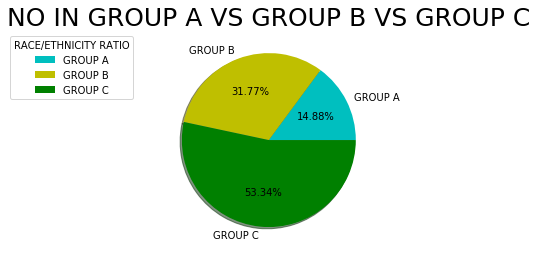

In [52]:
#count no of group A ,group B and group C
A=df['race/ethnicity'].value_counts()['group A']
B=df['race/ethnicity'].value_counts()['group B']
C=df['race/ethnicity'].value_counts()['group C']

#plot pie-chart
labels='GROUP A','GROUP B','GROUP C'
sizes=[A,B,C]
colors = ['c', 'y','g']

plt.pie(sizes,labels=labels,shadow= True,autopct='%1.2f%%',colors=colors)
plt.title('NO IN GROUP A VS GROUP B VS GROUP C',size=25)
plt.legend(labels,title='RACE/ETHNICITY RATIO',loc='best',bbox_to_anchor=(-0.1,1.))
plt.show()

# K-MEANS CLUSTERING

In [53]:
#import library for 3-d Plot
from mpl_toolkits.mplot3d import Axes3D


Text(0.5, 0.92, 'Scatter Plot')

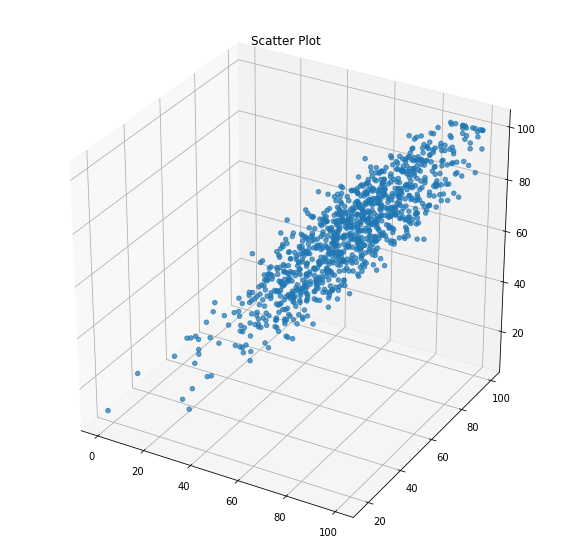

In [54]:
#Scatter Plot
colormap=np.array(['red','blue','black'])
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.math_score,x.reading_score,x.writing_score,linewidths=1, alpha=.7
           )
plt.title("Scatter Plot")

In [55]:
#import K-means cluster library
from sklearn.cluster import KMeans

#finding the K-value and Sum of Squared Error
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)
sse

[673318.602,
 281951.8965908354,
 177450.25542956137,
 136383.659334664,
 111307.99410631621,
 97540.71942973576,
 85717.54178889377,
 76991.36997921369,
 68508.89755795232]

Text(0.5, 1.0, 'ELBOW METHOD GRAPH')

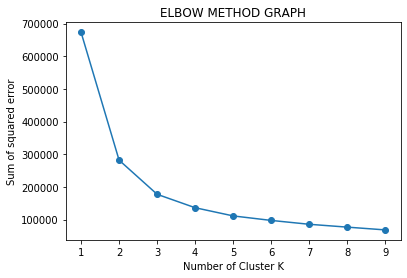

In [56]:
#Plot SSE against K
plt.xlabel('Number of Cluster K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,'-o')
plt.title('ELBOW METHOD GRAPH')

In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score

k_rng = range(2,10)

for n_clusters in k_rng:
    c=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=c.fit_predict(x)
    
    silhouette_avg=silhouette_score(x,cluster_labels)
    print('For n_clusters =', n_clusters,
          'The average silhoutte_score is= ',silhouette_avg)
    
    sample_silhoutte_value=silhouette_samples(x, cluster_labels)


For n_clusters = 2 The average silhoutte_score is=  0.4730479054290057
For n_clusters = 3 The average silhoutte_score is=  0.40507695577680886
For n_clusters = 4 The average silhoutte_score is=  0.35184497388943325
For n_clusters = 5 The average silhoutte_score is=  0.3320345990111526
For n_clusters = 6 The average silhoutte_score is=  0.29534840226331094
For n_clusters = 7 The average silhoutte_score is=  0.3045475360673847
For n_clusters = 8 The average silhoutte_score is=  0.30536646513810684
For n_clusters = 9 The average silhoutte_score is=  0.30664334202491084


In [58]:
#Fit the model
km=KMeans(n_clusters=3)
km.fit(x)
km.labels_

array([2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1,

Text(0.5, 0.92, 'K-Means Clustering-3D Plot')

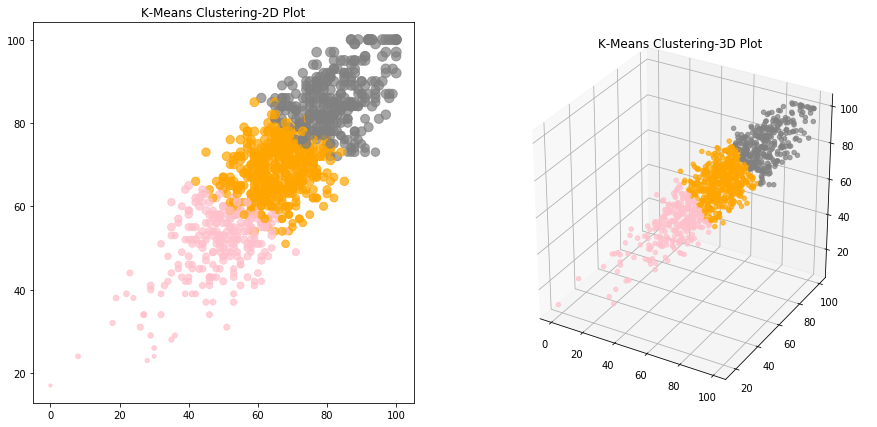

In [59]:
#plot Clustering graph in 2-D and 3-D

colormap=np.array(['pink','gray','orange','cyan','magenta'])
fig=plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(x.math_score,x.reading_score,x.writing_score, alpha=.7,
           c=colormap[km.labels_])
plt.title("K-Means Clustering-2D Plot")

ax = fig.add_subplot(122, projection='3d')
ax.scatter3D(x.math_score,x.reading_score,x.writing_score,linewidths=1, alpha=.7,
           c=colormap[km.labels_])
plt.title("K-Means Clustering-3D Plot")

# HIERARCHICAL CLUSTERING 

In [60]:
#making array
y=x.values
y

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [61]:
#import library
import scipy.cluster.hierarchy as sch

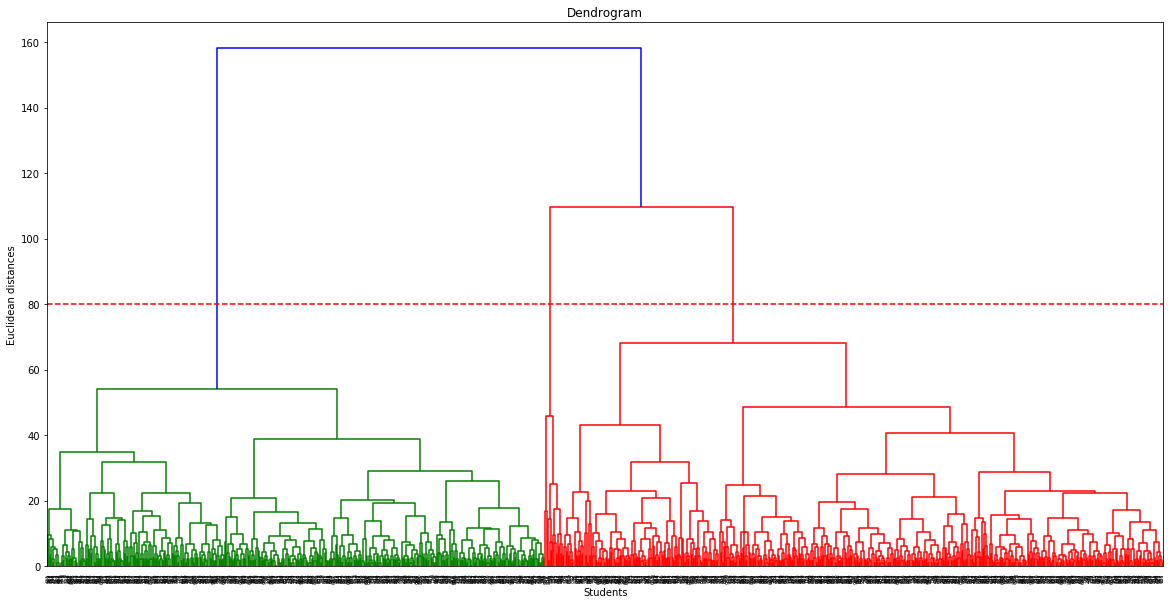

In [62]:
#plot dendrogram
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(y, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

The x-axis represents the samples and y-axis represents the distance between these samples.The vertical line with maximum distance ,we can decide it as a threshold of 80 and cut the dendrogram.

From the above dendrogram , we have three clusters as this line cuts the dendrogram at three points.

In [63]:
#Applying agglomerative (hierarchial) clustering
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')

In [64]:
#Fit the model
y_hc=hc.fit_predict(y)
y_hc

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,

Text(0.5, 1.0, 'Clusters of Students (Hierarchical Clustering Model)')

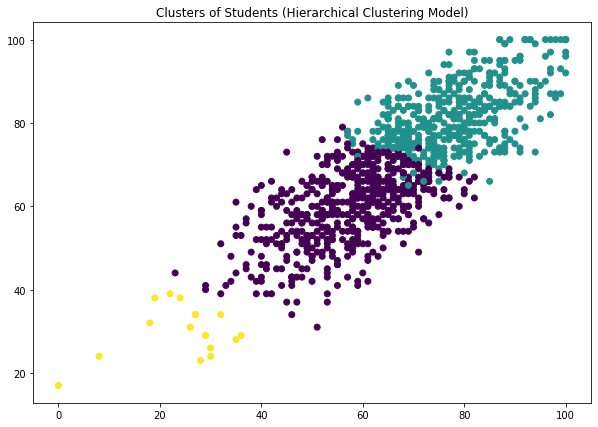

In [65]:
#plot hierarchial scatter plot
plt.figure(figsize=(10, 7))  
plt.scatter(x.math_score, x.reading_score, c=hc.labels_)
plt.title('Clusters of Students (Hierarchical Clustering Model)')

# DBSCAN

In [66]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=9, metric='euclidean', min_samples=9)

In [67]:
dbscan.fit(y)

DBSCAN(algorithm='auto', eps=9, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=9, n_jobs=None, p=None)

In [68]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

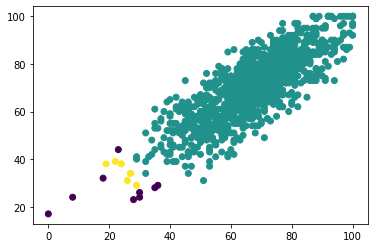

In [69]:
plt.scatter(x.math_score, x.reading_score, c=dbscan.labels_)